Nice, let’s play with this dataset together 🧪

I’ll give you a **step-by-step EDA script** you can run in a Kaggle notebook. We’ll go in this order:

1. Load data
2. Inspect structure & columns
3. Find the target column
4. Look at class balance
5. Explore relationships: numeric & categorical features vs target
6. Correlation heatmap

You can copy-paste cell by cell and run.

---

## 1️⃣ Imports & read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

TRAIN_PATH = "/kaggle/input/playground-series-s5e12/train.csv"
TEST_PATH  = "/kaggle/input/playground-series-s5e12/test.csv"

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

print("Train shape:", train.shape)
print("Test shape :", test.shape)

train.head()

Train shape: (700000, 26)
Test shape : (300000, 25)


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


## 2️⃣ Quick structure check

In [2]:
# Column names
print(train.columns.tolist())

# Info: dtypes, nulls, etc.
train.info()

# Basic statistics for numeric columns
train.describe().T

['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64

,count,mean,std,min,25%,50%,75%,max
id,700000.0,349999.500000,202072.738554,0.00,174999.75,349999.50,524999.25,699999.00
age,700000.0,50.359734,11.655520,19.00,42.00,50.00,58.00,89.00
alcohol_consumption_per_week,700000.0,2.072411,1.048189,1.00,1.00,2.00,3.00,9.00
physical_activity_minutes_per_week,700000.0,80.230803,51.195071,1.00,49.00,71.00,96.00,747.00
diet_score,700000.0,5.963695,1.463336,0.10,5.00,6.00,7.00,9.90
sleep_hours_per_day,700000.0,7.002200,0.901907,3.10,6.40,7.00,7.60,9.90
screen_time_hours_per_day,700000.0,6.012733,2.022707,0.60,4.60,6.00,7.40,16.50
bmi,700000.0,25.874684,2.860705,15.10,23.90,25.90,27.80,38.40
waist_to_hip_ratio,700000.0,0.858766,0.037980,0.68,0.83,0.86,0.88,1.05
systolic_bp,700000.0,116.294193,11.010390,91.00,108.00,116.00,124.00,163.00


## 3️⃣ Identify the target column

In [3]:
# Columns not present in test -> likely ['id', target]
extra_cols = sorted(set(train.columns) - set(test.columns))
print("Columns only in train:", extra_cols)

Columns only in train: ['diagnosed_diabetes']


In [4]:
ID_COL = "id"          # change if your id column has another name
TARGET = [c for c in extra_cols if c != ID_COL][0]  # pick the non-id col

print("ID_COL:", ID_COL)
print("TARGET:", TARGET)

ID_COL: id
TARGET: diagnosed_diabetes


## 4️⃣ Target distribution (class balance)


diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64

Proportion:
diagnosed_diabetes
1.0    0.623296
0.0    0.376704
Name: proportion, dtype: float64


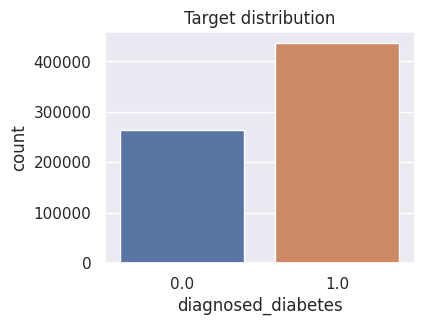

In [5]:
print(train[TARGET].value_counts())
print("\nProportion:")
print(train[TARGET].value_counts(normalize=True))

plt.figure(figsize=(4,3))
sns.countplot(data=train, x=TARGET)
plt.title("Target distribution")
plt.show()

## 5️⃣ Split numeric / categorical features

In [6]:
feature_cols = [c for c in train.columns if c not in [ID_COL, TARGET]]

num_cols = train[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

print("Numeric features    :", num_cols)
print("Categorical features:", cat_cols)

Numeric features    : ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categorical features: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']



## 6️⃣ Numeric features vs target

### 6.1 Group means by target


In [7]:
if num_cols:
    grouped_means = train.groupby(TARGET)[num_cols].mean().T
    display(grouped_means.sort_index())

    # Optional: show features where difference between classes is largest
    # (works best if TARGET is binary 0/1; adapt if it has 0/1/2 etc.)
    if train[TARGET].nunique() == 2:
        diff = grouped_means.iloc[:, 1] - grouped_means.iloc[:, 0]
        diff.name = "mean_diff"
        display(diff.sort_values(ascending=False))

diagnosed_diabetes,0.0,1.0
age,47.943484,51.820056
alcohol_consumption_per_week,2.068379,2.074849
bmi,25.486175,26.109489
cardiovascular_history,0.024866,0.033623
cholesterol_total,184.922531,187.964860
diastolic_bp,75.122464,75.633393
diet_score,6.058035,5.906678
family_history_diabetes,0.052618,0.207895
hdl_cholesterol,54.389237,53.481125
heart_rate,69.954747,70.296482


triglycerides                          4.627429
ldl_cholesterol                        4.034501
age                                    3.876572
cholesterol_total                      3.042328
systolic_bp                            2.434295
bmi                                    0.623314
diastolic_bp                           0.510929
heart_rate                             0.341735
family_history_diabetes                0.155277
screen_time_hours_per_day              0.076026
hypertension_history                   0.023871
cardiovascular_history                 0.008757
sleep_hours_per_day                    0.006531
alcohol_consumption_per_week           0.006470
waist_to_hip_ratio                     0.006353
diet_score                            -0.151357
hdl_cholesterol                       -0.908112
physical_activity_minutes_per_week   -17.938628
Name: mean_diff, dtype: float64

### 6.2 Distributions by target


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


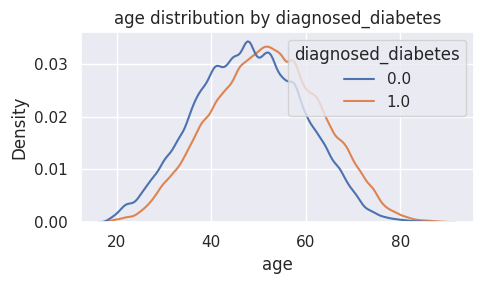

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


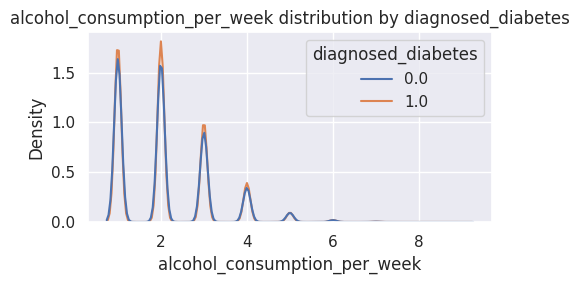

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


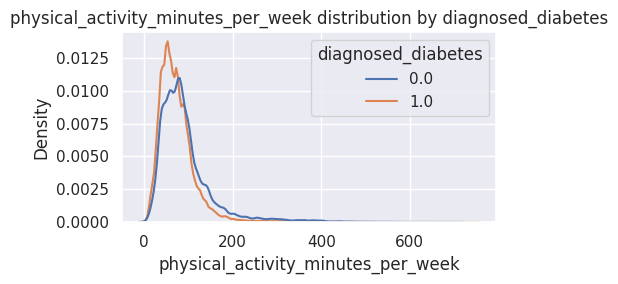

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


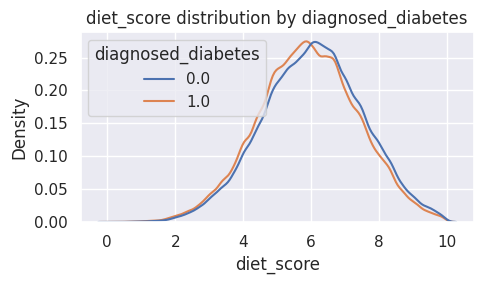

In [8]:
# Pick up to 4 interesting numeric columns manually
cols_to_plot = num_cols[:4]  # replace with specific names once you see columns

for col in cols_to_plot:
    plt.figure(figsize=(5,3))
    sns.kdeplot(data=train, x=col, hue=TARGET, common_norm=False)
    plt.title(f"{col} distribution by {TARGET}")
    plt.tight_layout()
    plt.show()

## 7️⃣ Categorical / binary features vs target

For 0/1 or small-category columns, cross-tabs are very informative.



=== alcohol_consumption_per_week vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
alcohol_consumption_per_week,,
1,38.1,61.9
2,37.3,62.7
3,37.6,62.4
4,37.1,62.9
5,39.4,60.6
6,38.6,61.4
7,40.5,59.5
8,39.0,61.0
9,66.7,33.3


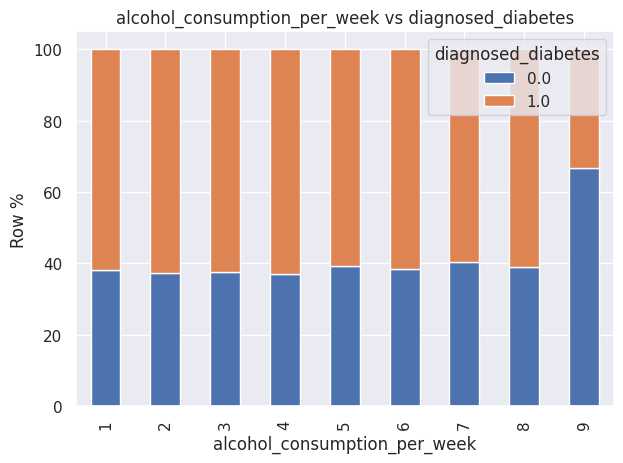


=== gender vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
gender,,
Female,37.8,62.2
Male,37.6,62.4
Other,35.9,64.1


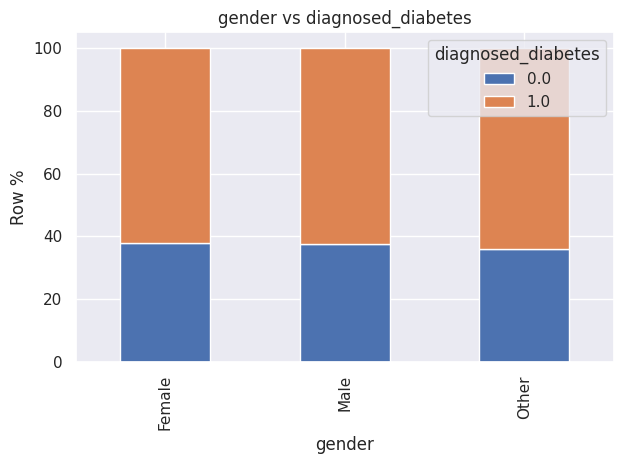


=== ethnicity vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
ethnicity,,
Asian,37.2,62.8
Black,37.6,62.4
Hispanic,38.4,61.6
Other,36.4,63.6
White,37.6,62.4


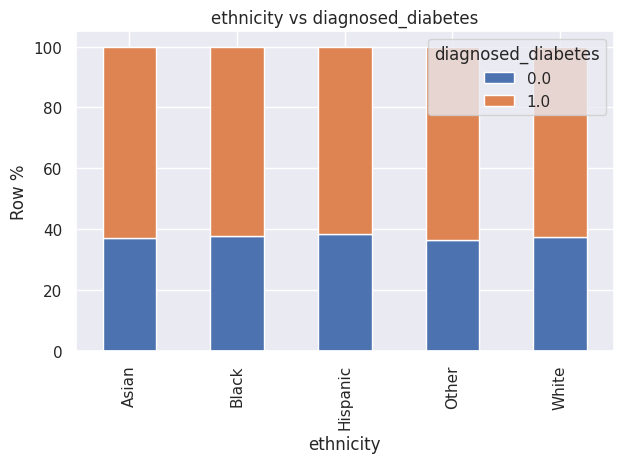


=== education_level vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
education_level,,
Graduate,37.3,62.7
Highschool,37.9,62.1
No formal,36.4,63.6
Postgraduate,38.3,61.7


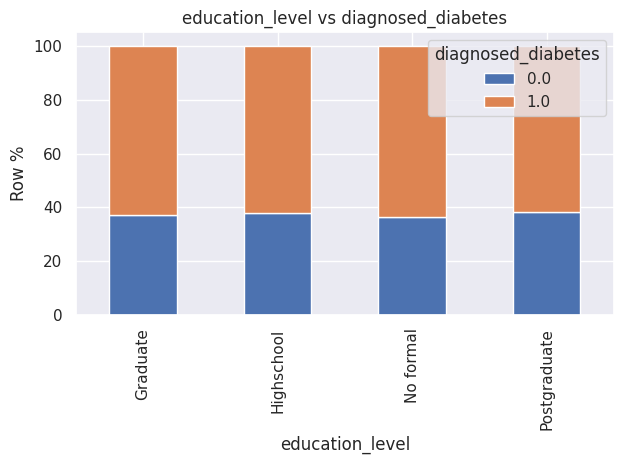


=== income_level vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
income_level,,
High,37.6,62.4
Low,37.0,63.0
Lower-Middle,37.3,62.7
Middle,38.0,62.0
Upper-Middle,38.0,62.0


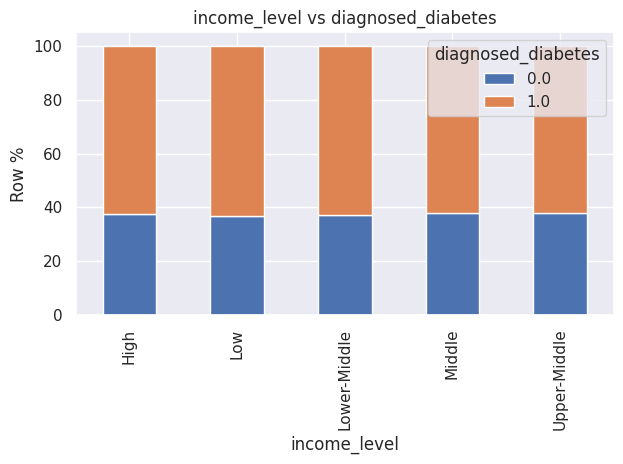


=== smoking_status vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
smoking_status,,
Current,37.7,62.3
Former,37.5,62.5
Never,37.7,62.3


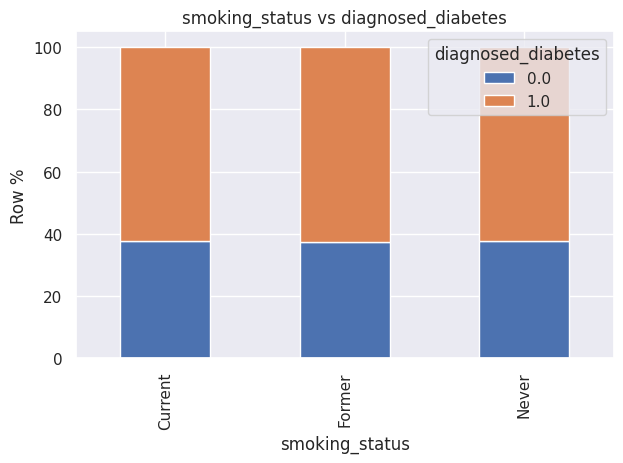


=== employment_status vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
employment_status,,
Employed,37.5,62.5
Retired,38.2,61.8
Student,37.8,62.2
Unemployed,37.8,62.2


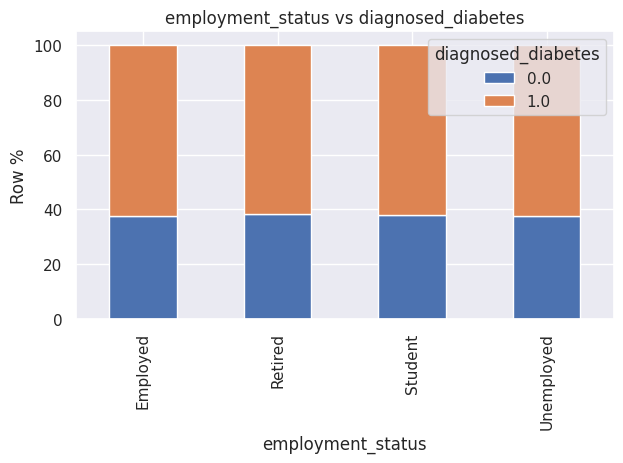


=== family_history_diabetes vs diagnosed_diabetes (%) ===


diagnosed_diabetes,0.0,1.0
family_history_diabetes,,
0,42.0,58.0
1,13.3,86.7


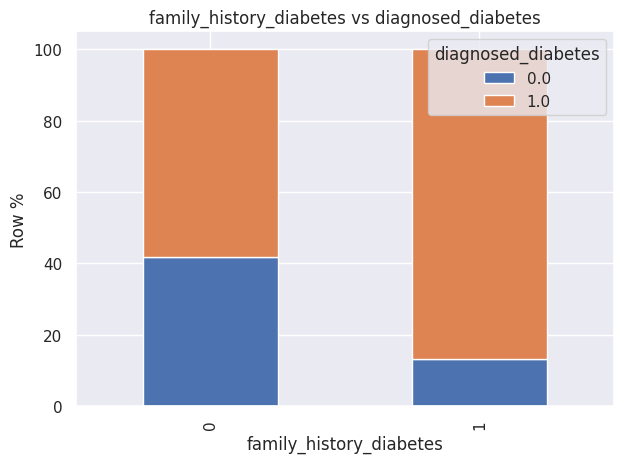

In [9]:
def plot_categorical_relation(df, col, target):
    ct = pd.crosstab(df[col], df[target], normalize="index") * 100
    print(f"\n=== {col} vs {target} (%) ===")
    display(ct.round(1))

    ct.plot(kind="bar", stacked=True)
    plt.ylabel("Row %")
    plt.title(f"{col} vs {target}")
    plt.legend(title=target)
    plt.tight_layout()
    plt.show()

# Treat small-cardinality columns as categorical
small_card_cols = [c for c in feature_cols if train[c].nunique() <= 10]

for col in small_card_cols[:8]:   # first few; can expand
    plot_categorical_relation(train, col, TARGET)

## 8️⃣ Correlation heatmap (numeric)

This is useful for spotting multicollinearity and linear patterns.


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


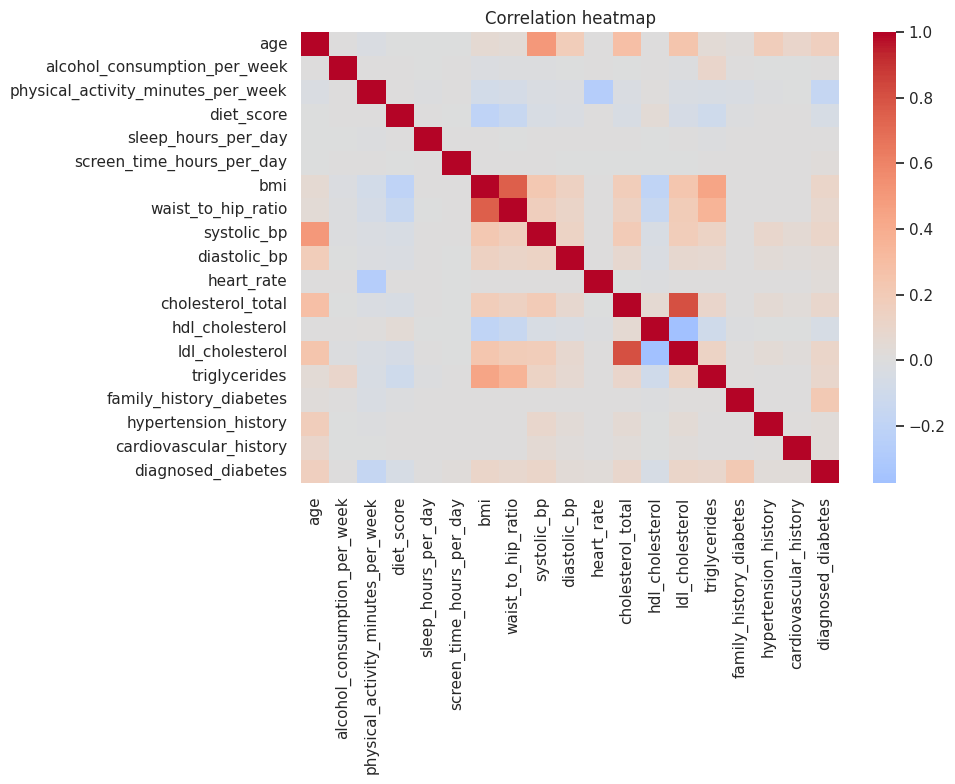

Correlation with target:


family_history_diabetes               0.211064
age                                   0.161162
systolic_bp                           0.107132
bmi                                   0.105580
ldl_cholesterol                       0.102771
triglycerides                         0.090635
cholesterol_total                     0.088112
waist_to_hip_ratio                    0.081050
diastolic_bp                          0.036271
hypertension_history                  0.029979
cardiovascular_history                0.024746
heart_rate                            0.023865
screen_time_hours_per_day             0.018213
sleep_hours_per_day                   0.003509
alcohol_consumption_per_week          0.002991
diet_score                           -0.050119
hdl_cholesterol                      -0.053231
physical_activity_minutes_per_week   -0.169789
Name: diagnosed_diabetes, dtype: float64

In [10]:
corr = train[num_cols + [TARGET]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation heatmap")
plt.tight_layout()
plt.show()

# Correlation of each feature with target
target_corr = corr[TARGET].drop(TARGET).sort_values(ascending=False)
print("Correlation with target:")
display(target_corr)

## 9️⃣ A very quick baseline model (optional bonus)


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

ID_COL = "id"
TARGET = "diagnosed_diabetes"

feature_cols = [c for c in train.columns if c not in [ID_COL, TARGET]]

# 1. Split numeric / categorical
num_cols = train[feature_cols].select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

print("Numeric:", num_cols)
print("Categorical:", cat_cols)

# 2. One-hot encode categoricals
X = train[feature_cols].copy()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)  # drop_first to avoid dummy trap
y = train[TARGET].astype(int)

print("X shape after encoding:", X.shape)

# 3. Train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. RandomForest baseline
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 5. Evaluate (binary case)
proba_valid = model.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, proba_valid)
print("Validation AUC:", auc)


Numeric: ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categorical: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']
X shape after encoding: (700000, 36)
Validation AUC: 0.6972368644344901


## ✅ LightGBM training + feature importance

In [12]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

TRAIN_PATH = "/kaggle/input/playground-series-s5e12/train.csv"
TEST_PATH  = "/kaggle/input/playground-series-s5e12/test.csv"
SUB_PATH   = "/kaggle/input/playground-series-s5e12/sample_submission.csv"

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

ID_COL = "id"
TARGET = "diagnosed_diabetes"

feature_cols = [c for c in train.columns if c not in [ID_COL, TARGET]]

# Split numeric / categorical
num_cols = train[feature_cols].select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = [c for c in feature_cols if c not in num_cols]

print("Numeric features    :", num_cols)
print("Categorical features:", cat_cols)

# --- Make a shared category mapping train+test, then convert to int codes ---
for col in cat_cols:
    # combine then create categories
    all_vals = pd.concat([train[col], test[col]], axis=0).astype("category")
    cats = all_vals.cat.categories

    train[col] = pd.Categorical(train[col], categories=cats).codes
    test[col]  = pd.Categorical(test[col],  categories=cats).codes

# X, y
X = train[feature_cols]
y = train[TARGET].astype(int)
X_test = test[feature_cols]


Numeric features    : ['age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']
Categorical features: ['gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status']


In [13]:
# train/valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

lgbm = LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],
    eval_metric="auc",
    categorical_feature=cat_cols,  # these are the int-coded categorials
    callbacks=[
        lgb.early_stopping(stopping_rounds=100),
        lgb.log_evaluation(100),
    ],
)

proba_valid = lgbm.predict_proba(X_valid)[:, 1]
auc = roc_auc_score(y_valid, proba_valid)
print(f"\nValidation AUC: {auc:.5f}")


[LightGBM] [Info] Number of positive: 349046, number of negative: 210954
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1653
[LightGBM] [Info] Number of data points in the train set: 560000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503564
[LightGBM] [Info] Start training from score 0.503564
Training until validation scores don't improve for 100 rounds
[100]	valid_0's auc: 0.717435	valid_0's binary_logloss: 0.592415
[200]	valid_0's auc: 0.722554	valid_0's binary_logloss: 0.586786
[300]	valid_0's auc: 0.72428	valid_0's binary_logloss: 0.58519
[400]	valid_0's auc: 0.724832	valid_0's binary_logloss: 0.584717
[500]	valid_0's auc: 0.725087	valid_0's binary_logloss: 0.584465
[600]	valid_0's auc: 0.725388	valid_0's binary_logloss: 


Top 20 features by gain:


,feature,importance_gain
2,physical_activity_minutes_per_week,612695.546663
21,family_history_diabetes,481705.423099
0,age,278409.520113
14,triglycerides,134975.123298
6,bmi,99532.416386
13,ldl_cholesterol,69844.158667
8,systolic_bp,54115.586322
3,diet_score,51514.745121
11,cholesterol_total,51339.060600
10,heart_rate,45655.975662


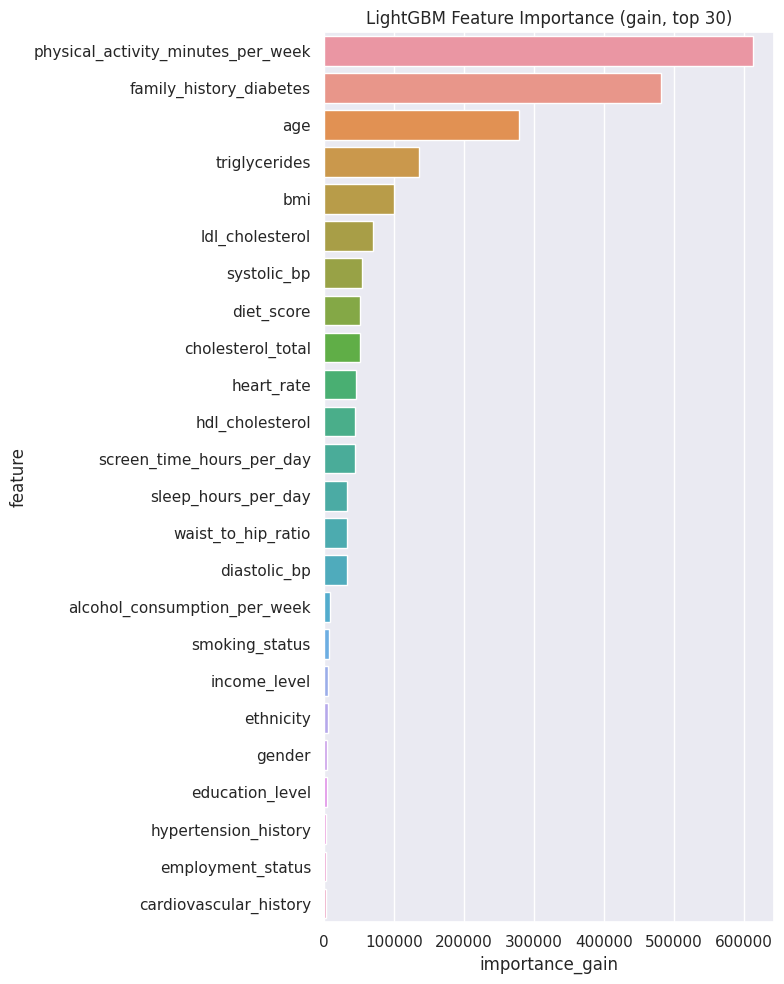

In [14]:
booster = lgbm.booster_
importance_gain = booster.feature_importance(importance_type="gain")
feature_names = booster.feature_name()

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance_gain": importance_gain,
}).sort_values("importance_gain", ascending=False)

print("\nTop 20 features by gain:")
display(fi_df.head(20))

# Plot top 30
top_n = 30
plt.figure(figsize=(8, 10))
sns.barplot(data=fi_df.head(top_n), x="importance_gain", y="feature")
plt.title(f"LightGBM Feature Importance (gain, top {top_n})")
plt.tight_layout()
plt.show()


In [15]:
# use best_iteration_ from validation model if available
best_iter = lgbm.best_iteration_ if lgbm.best_iteration_ is not None else lgbm.n_estimators
print("Using n_estimators =", best_iter)

lgbm_full = LGBMClassifier(
    n_estimators=best_iter,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm_full.fit(
    X,
    y,
    categorical_feature=cat_cols,
)

test_pred = lgbm_full.predict_proba(X_test)[:, 1]

sub = pd.read_csv(SUB_PATH)
sub["diagnosed_diabetes"] = test_pred
sub.to_csv("submission.csv", index=False)
print("Saved submission.csv")
sub.head()


Using n_estimators = 1459
[LightGBM] [Info] Number of positive: 436307, number of negative: 263693
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.073071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1648
[LightGBM] [Info] Number of data points in the train set: 700000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.623296 -> initscore=0.503561
[LightGBM] [Info] Start training from score 0.503561
Saved submission.csv


,id,diagnosed_diabetes
0,700000,0.490748
1,700001,0.686767
2,700002,0.785039
3,700003,0.362222
4,700004,0.903282
